# Draft workbook to test plotting functions

Plots to do:
- Basic TS plot
- Seasonal plot + polar!
- Seasonal subseries plot (also box?)
- Scatterplot
- ACF plots

## Imports and setups

In [4]:
import sys
sys.path.append('../')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from gtime.preprocessing import TimeSeriesPreparation
from gtime.compose import FeatureCreation
from gtime.time_series_models import (
    NaiveForecastModel, 
    SeasonalNaiveForecastModel, 
    AverageForecastModel, 
    DriftForecastModel,
)

## Ploting functions

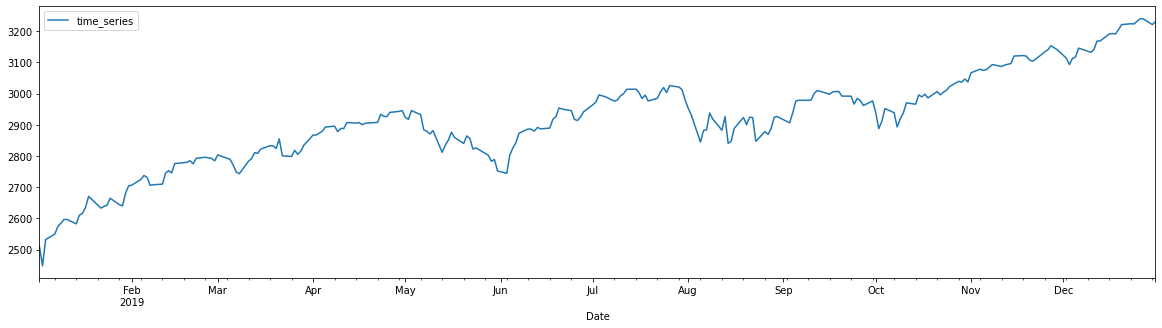

In [69]:
df_sp = pd.read_csv('data/^GSPC.csv')
df_close = df_sp.set_index('Date')['Close']
df_close.index = pd.to_datetime(df_close.index)
time_series_preparation = TimeSeriesPreparation()
period_index_time_series = time_series_preparation.transform(df_close)
period_index_time_series.plot(figsize=(20, 5))
plt.show()

## Time series setup

In [74]:
dir(period_index_time_series.index[0])

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_delta',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_typ',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [174]:
# helper functions

def seasonal_split(df : pd.DataFrame, season):
    
    if isinstance(season, str):
        if season == 'year':
            df['Season_name'] = df.index.year
            df['Idx'] = df.index.dayofyear
        elif season == 'month':
            df['Season_name'] = list(map(lambda x: '_'.join([str(x.year), str(x.month)]), df.index))
            df['Idx'] = df.index.day
        elif season == 'week':
            df['Season_name'] = list(map(lambda x: '_'.join([str(x.year), str(x.weekofyear)]), df.index))
            df['Idx'] = df.index.dayofweek
        else:
            raise ValueError("Incorrent period name")
        
#     return df.set_index(['Season_name', 'Idx']).unstack(level=0)
    return df.set_index(['Season_name', 'Idx']).unstack(level=0)



/Users/semyonburyachenko/Documents/Upwork/Giotto/venv/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


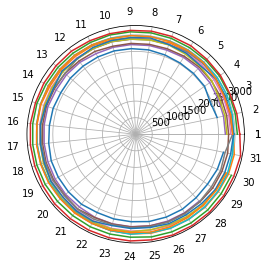

In [176]:
def plot_fun(df):
    ax = df.plot(figsize=(20, 5))
    ax.legend()
    plt.show()
    return ax

def basic_ts(df):
    ax = plot_fun(df)
    return ax

def polar_ts(df):
    
    
    df = df.append(df.iloc[0])
    ax = plt.subplot(111, projection='polar')
    angles = [x * 360 / (len(df) - 1) for x in range(len(df))]
    theta = [x / 360 * 2 * np.pi for x in angles]
    for col in df.columns:
        plt.polar(theta, df[col])
    ax.set_thetagrids(angles=angles)
    ax.set_xticklabels(df.index)
    plt.show()

def season_ts(df: pd.DataFrame, season=None, polar=False):
    df_seas = seasonal_split(df, season)
    if polar:
        ax = polar_ts(df_seas)
    else:
        ax = basic_ts(df_seas)
    return ax

season_ts(period_index_time_series.resample('D').first().fillna(method='ffill'), 'month', polar=True)

## Tests

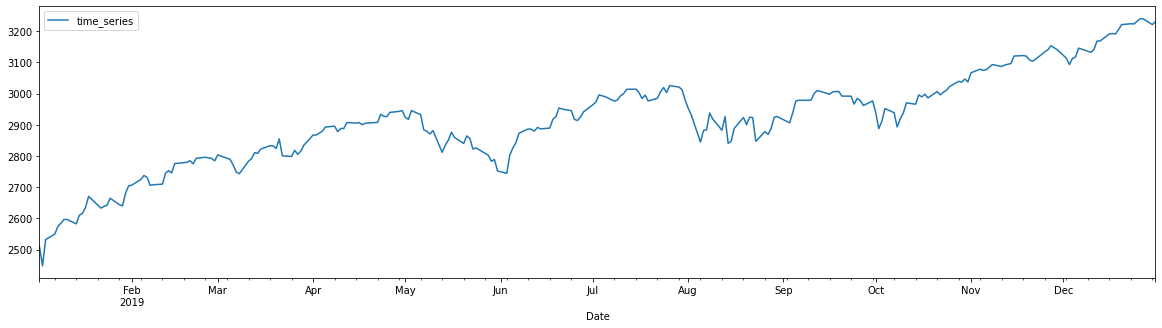

In [16]:
season_ts(period_index_time_series)

In [157]:
dir(period_index_time_series.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_arithmetic_ops',
 '_add_comparison_methods',
 '_add_comparison_ops',
 '_add_datetimelike_methods',
 '_add

In [158]:
period_index_time_series.index.freqstr

'D'

In [168]:
period_index_time_series.resample('D').first().fillna(method='ffill')

,time_series,Season_name,Idx
Date,,,
2019-01-02,2510.030029,2019_1,2.0
2019-01-03,2447.889893,2019_1,3.0
2019-01-04,2531.939941,2019_1,4.0
2019-01-05,2531.939941,2019_1,4.0
2019-01-06,2531.939941,2019_1,4.0
...,...,...,...
2019-12-27,3240.020020,2019_12,27.0
2019-12-28,3240.020020,2019_12,27.0
2019-12-29,3240.020020,2019_12,27.0


In [170]:
period_index_time_series.resample('D').first().fillna(method='ffill')

,time_series,Season_name,Idx
Date,,,
2019-01-02,2510.030029,2019_1,2.0
2019-01-03,2447.889893,2019_1,3.0
2019-01-04,2531.939941,2019_1,4.0
2019-01-05,2531.939941,2019_1,4.0
2019-01-06,2531.939941,2019_1,4.0
...,...,...,...
2019-12-27,3240.020020,2019_12,27.0
2019-12-28,3240.020020,2019_12,27.0
2019-12-29,3240.020020,2019_12,27.0


PeriodIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
             '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
             '2019-01-14', '2019-01-15',
             ...
             '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
             '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
             '2019-12-30', '2019-12-31'],
            dtype='period[D]', name='Date', length=252, freq='D')